# Exploring the WCWH Ambassador Family Beacon IAQ Data
(See [GH repo](https://github.com/intelligent-environments-lab/utx000))

# Summary
This notebook helps look at the measurements taken during the study period for the various sensors on the beacons.

In [1]:
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# Package Import

In [2]:
import sys
sys.path.append('../')

from src.visualization import visualize
from src.data import wcwh
from src.exploration import beacon_summary

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 200)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

from datetime import datetime, timedelta

# Table of Contents
1. [Notes on Analysis and References](#refs)
2. [Data Notes and Import](#import)
3. [Operation and Available Data](#operation)
4. [Aggregated Summary](#aggregated)
5. [Participant Based](#pt-based)

---

<a id="refs"></a>

# Notes on Analysis and References
The analyses in this notebook are primarily surface-level, but are described briefly below.

## References
Some of the references used for analysis as well as for programming.

### Programming
1. [How to Replace Negative Numbers with 0](https://stackoverflow.com/questions/27759084/how-to-replace-negative-numbers-in-pandas-data-frame-by-zero/27759140): For corrected beacon data that corrected values to negatives.
2. [Add Missing Dates to DataFrame Index](https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe): To fill in missing timestamps when the beacon would have gone offline so we can accurately understand reliability.

---

<a id="import"></a>

# Data Notes and Import
Some notes on the data we use and then importing the actual data to look at.

## WCWH Ambassador Families
The ambassador families represent those that signed on for a beta test of all our protocol including the BEVO Beacon. The following devices were included in the rollout:

```python
beacon_list = [1,16,30,36]
```

## TEST IMPORT

<div class="alert alert-block alert-info">
 
Testing the functionality of the beacon data import class for the WCWH pilot family era.
    
</div>

In [3]:
test_import = wcwh.wcwh(study="wcwh_pilot",suffix="wcwh_s21",data_dir="../data",verbose=2,start_time=datetime(2022,1,1),end_time=datetime(2022,1,24))
test_import.process_beacon(extreme="zscore",retain_negative=False)

	Processing beacon data...

		Reading for beacon:
		01
			No NO2 sensor - switch NO2 headers to CO
			Removing negative values
			Retaining NaN values
		02
			No data available for Beacon 2 between 2022-01-01 00:00:00 - 2022-01-24 00:00:00
		03
			No data available for Beacon 3 between 2022-01-01 00:00:00 - 2022-01-24 00:00:00
		04
			No data available for Beacon 4 between 2022-01-01 00:00:00 - 2022-01-24 00:00:00
		05
			No data available for Beacon 5 between 2022-01-01 00:00:00 - 2022-01-24 00:00:00
		06
			No data available for Beacon 6 between 2022-01-01 00:00:00 - 2022-01-24 00:00:00
		07
			No data available for Beacon 7 between 2022-01-01 00:00:00 - 2022-01-24 00:00:00
		08
			No data available for Beacon 8 between 2022-01-01 00:00:00 - 2022-01-24 00:00:00
		09
			No data available for Beacon 9 between 2022-01-01 00:00:00 - 2022-01-24 00:00:00
		10
			No data available for Beacon 10 between 2022-01-01 00:00:00 - 2022-01-24 00:00:00
		11
			No data available for Beacon 11 between

True

In [4]:
test_import.beacon_data.head()

,co,co2,lux,no2,pm1_mass,pm10_mass,pm2p5_mass,pm1_number,pm10_number,pm2p5_number,tvoc,temperature_c,rh,beacon
timestamp,,,,,,,,,,,,,,
2022-01-01 00:00:00,5.610029,1263.794555,2.04,NaN,0.873541,2.202672,33.302178,52.450571,61.236338,59.706638,1.164888,6.508968,48.0,1
2022-01-01 00:01:00,5.610029,1534.013224,2.04,NaN,0.495397,0.443060,3.427843,28.680209,30.005432,29.787674,8.736656,6.508968,48.0,1
2022-01-01 00:02:00,5.610029,1488.203104,2.04,NaN,0.479096,0.731879,7.145036,25.903811,28.902724,28.385579,13.396206,6.508968,48.0,1
2022-01-01 00:03:00,5.613689,1493.921690,2.04,NaN,0.687357,1.351086,18.796054,40.675984,45.869332,44.971157,2.523923,6.508968,48.0,1
2022-01-01 00:04:00,5.615153,1505.806971,2.04,NaN,0.591876,1.686079,21.948349,30.930529,38.503994,37.176445,13.784502,6.508968,48.0,1


<div class="alert alert-block alert-success">
 
Looks like, at least at this time, that the `wcwh` class is able to successfully import and clean the beacon data from the devices out in the field.
    
</div>

## Complete Beacon
The complete set of beacon data represented by the object `beacon`

In [5]:
beacon = beacon_summary.Summarize(study="wcwh_pilot",suffix="wcwh_s21",data_dir="../data/")
beacon.data.head()

,co,co2,lux,no2,pm1_mass,pm10_mass,pm2p5_mass,pm1_number,pm10_number,pm2p5_number,tvoc,temperature_c,rh,beacon
timestamp,,,,,,,,,,,,,,
2022-01-01 00:00:00,5.610029,1263.794555,2.04,NaN,0.873541,2.202672,33.302178,52.450571,61.236338,59.706638,1.164888,6.508968,48.0,1
2022-01-01 00:01:00,5.610029,1534.013224,2.04,NaN,0.495397,0.443060,3.427843,28.680209,30.005432,29.787674,8.736656,6.508968,48.0,1
2022-01-01 00:02:00,5.610029,1488.203104,2.04,NaN,0.479096,0.731879,7.145036,25.903811,28.902724,28.385579,13.396206,6.508968,48.0,1
2022-01-01 00:03:00,5.613689,1493.921690,2.04,NaN,0.687357,1.351086,18.796054,40.675984,45.869332,44.971157,2.523923,6.508968,48.0,1
2022-01-01 00:04:00,5.615153,1505.806971,2.04,NaN,0.591876,1.686079,21.948349,30.930529,38.503994,37.176445,13.784502,6.508968,48.0,1


---

<a id="operation"></a>

# Operation/Reliability and Available Data
A look at how reliably the beacons have be monitoring the space and what data are available.

## Sensor Operation
Operation break-down by sensor

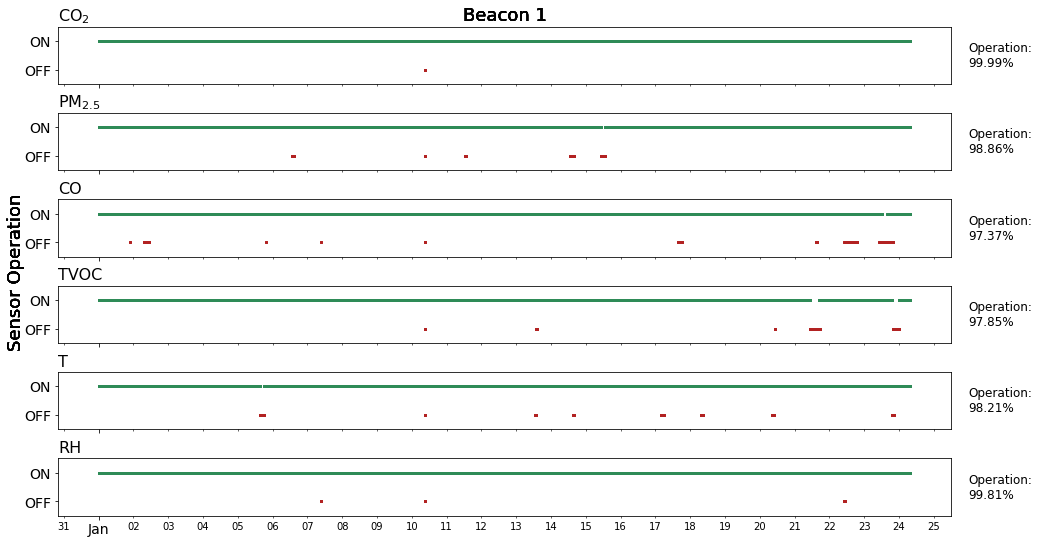

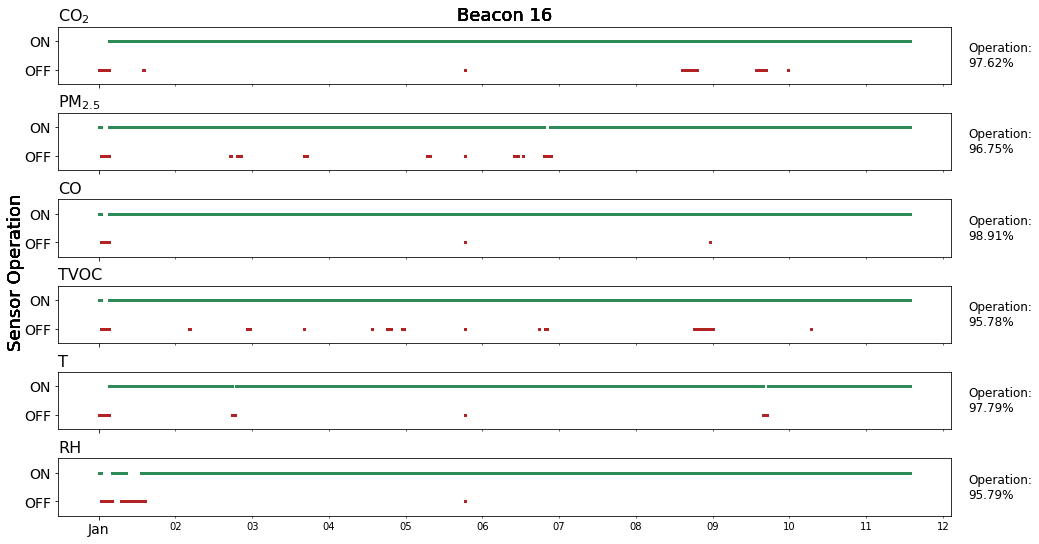

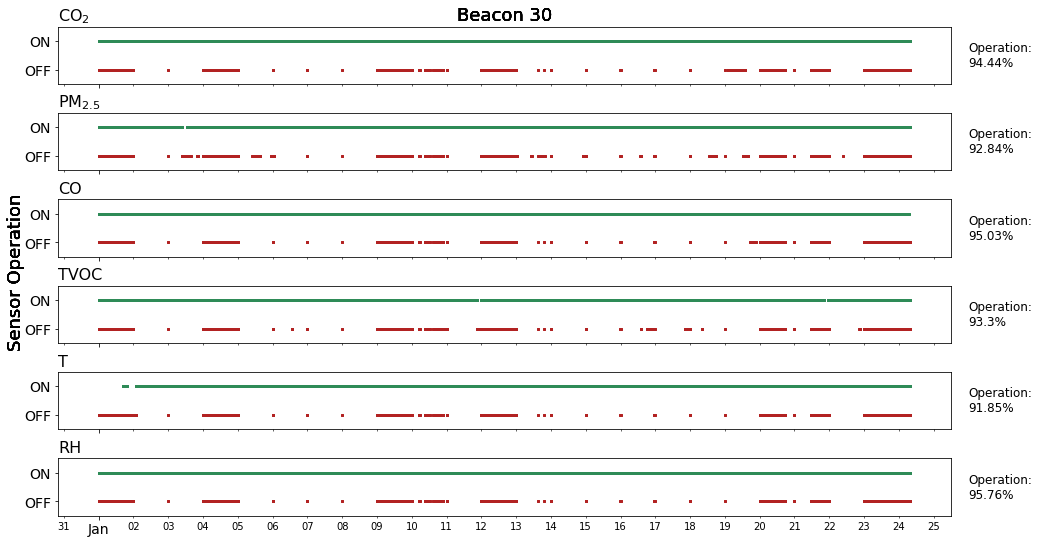

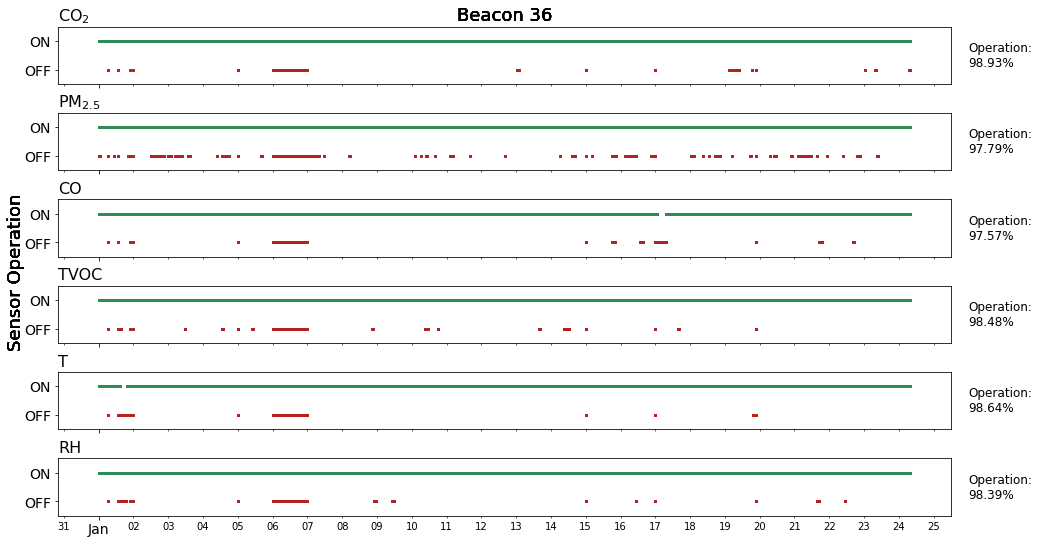

In [27]:
beacon.plot_sensor_operation()

<div class="alert alert-block alert-warning">
 
Beacon 30 seems to have periods where data are missing at every other timestamp and merits a closer look.
    
</div>

### Beacon 30
These are some of the periods where Beacon 30 exhibits extensive missing data:
* 01/01/22 - 01/02/22
* 01/09/22 - 01/11/22

These periods are also consistent across all sensors. However, the PM sensors seems to go offline a bit more often during these periods:
* 01/05/22 - 01/06/22
* 01/13/22 12:00 - 01/14/22

In [28]:
b30 = beacon.get_beacon(30)

---

<a id="aggregated"></a>

# Aggregated Summary
Starting with a summary of all the available data

In [ ]:
beacon.get_summary_stats()

In [ ]:
beacon.plot_aggregate_distributions()

For the most part, the beacons appear to be behaving normally with measurements within normal ranges with the occasional extreme measurements consistent with activity like cooking and cleaning.

<div class="alert alert-block alert-danger">
 
The temperature measurements are very low and cannot be accurate. The likely cause is the correction file that we are using so I should first re-examine if I am using the right file and then if so, look at the raw data prior to correcting. 
    
</div>

---

<a id="pt-based"></a>

# Participant-Based Summary

In [ ]:
beacon.plot_beacon_joyplots_by_stat()

In [ ]:
def plot_beacon_boxplots_by_stat(df,by_var='beacon',by_stat="mean",save=False,study_suffix="ux_s20",figure_note=""):
    '''
    Plots joyplots for the major sensors on the beacon. 
    
    Input:
    - df: DataFrame with data columns of data to plot
    - by_var: string of column used to separate the individual distributions by
    - by_stat: summary stat to order joyplots by
    
    Returns void
    '''
    variables = ['co2','pm2p5_mass','lux','no2','co','tvoc']
    units = ["Carbon Dioxide (ppm)","PM2.5 ($\mu$g/m$^3$)","Light Level (lux)","Nitrogen Dioxide (ppb)","Carbon Monoxide (ppm)"," TVOC (ppb)"]
    titles = ["a","b","c","d","e","f"]
    colors = ['cornflowerblue','grey','goldenrod','firebrick','pink','seagreen']
    limits = [[400,3000],[0,10],[0,100],[0,700],[0,12,46],[0,800]]
    
    for var, color, limit, unit, title in zip(variables, colors, limits, units, titles):
        df_filtered = pd.DataFrame()
        for bb in df[by_var].unique():
            temp = df[df[by_var] == bb]
            temp['stat'] = temp[var].median() + 0.0001*int(bb)

            if len(temp) > 0:
                df_filtered = df_filtered.append(temp)
                
        fig, ax = plt.subplots(figsize=(20,8))
        df_filtered.sort_values("stat",inplace=True,ascending=False)
        sns.boxplot(x="stat",y=var,order=df_filtered["stat"].unique(),data=df_filtered)
        ax.set_xticklabels(df_filtered["beacon"].unique(),fontsize=14)
        ax.set_xlabel("")
        plt.yticks(fontsize=14)
        ax.set_ylabel(unit,fontsize=16)
        for loc in ["top","right"]:
            ax.spines[loc].set_visible(False)
            
        if save == True:
            plt.savefig(f'../reports/figures/beacon_summary/beacon-{var}-joyplot{figure_note}-{study_suffix}.pdf',bbox_inches="tight")
        plt.show()
        plt.close()

In [ ]:
def plot_correlation_matrix_filtered(df,name="partially_filtered",variables=['lux','temperature_c','rh','tvoc','co2','co','no2','pm2p5_mass'], save=False):
    """plots correlation matrix between variables"""
    df = df[variables]
    df.columns = [visualize.get_label(col) for col in df.columns]
    corr = df.corr()
    corr = round(corr,2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.heatmap(corr, mask=mask, 
                     vmin=-1, vmax=1, center=0, 
                     cmap=sns.diverging_palette(20, 220, n=200),cbar_kws={'ticks':[-1,-0.5,0,0.5,1],"pad":-0.07,"shrink":0.8,"anchor":(0.0,0.0)},fmt=".2f",
                     square=True,linewidths=1,annot=True,annot_kws={"size":12},ax=ax)
    # colorbar
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.outline.set_color('black')
    cbar.outline.set_linewidth(0.5)
    
    yticklabels = ax.get_yticklabels()
    yticklabels[0] = ' '
    ax.set_yticklabels(yticklabels,rotation=0,ha='right',fontsize=14)

    xticklabels = ax.get_xticklabels()
    xticklabels[-1] = ' '
    ax.set_xticklabels(xticklabels,rotation=0,ha='center',fontsize=14)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    if save:
        plt.savefig(f'../reports/figures/beacon_{name}-correlation_matrix-ux_s20.pdf',bbox_inches='tight')
        #plt.savefig(f'../../papers/60a81c09c88429592190c90b/figures/beacon_{name}-correlation_matrix-ux_s20.pdf',bbox_inches="tight")
    plt.show()
    plt.close()

In [ ]:
def ts_inspection(df_in,variable,start_time,end_time,re=False,**kwargs):
    """plots timeseries data for certain variable"""
    df = df_in.copy()
    if "beacon" in kwargs.keys():
        df = df[df["beacon"] == kwargs["beacon"]]
        
    df.index = pd.to_datetime(df.index)
    fig, ax = plt.subplots(figsize=(24,4))
    df = df[start_time:end_time]
    ax.scatter(df.index,df[variable],color="black",s=5)
    # formatting
    for loc in ["top","right"]:
        ax.spines[loc].set_visible(False)

    if re:
        return ax
    
    plt.show()
    plt.close()

In [ ]:
def plot_data_availability_heatmap(df, df_filter='not', save=False, save_dir='../reports/figures/'):
    '''
    Plots a heatmap showing number of nights the various beacons measured for each sensor
    
    Inputs
    - df: dataframe with columns in columns_to_use
    - df_filter: the naming convention of the filtering applied to the beacon - used when saving
    - savefig: boolean specifying whether or not to save the file
    - save_dir: string of the location to save the figure
    
    Returns the count dataframe used to generate the heatmap
    '''
    legend_fs = 14
    tick_fs = 16
    label_fs = 18
    title_fs = 24
    # filtering the dataframe to only include import vars
    columns_to_use = ['lux','tvoc','co2','co','pm2p5_mass','beacon','start_time']
    df_filtered = df[columns_to_use]
    # dict to store the values
    data = {'lux':[],'tvoc':[],'co2':[],'co':[],'pm2p5_mass':[],'beacon':[]}
    # looping through the dataframe to get the number of nights each beacon measured
    for bb in df_filtered['beacon'].unique():
        df_by_bb = df_filtered[df_filtered['beacon'] == bb]
        df_by_bb_by_night = df_by_bb.groupby('start_time').mean()
        for var in columns_to_use:
            if var == 'start_time':
                pass
            elif var == 'beacon':
                data['beacon'].append(bb)
            else:
                data[var].append(df_by_bb_by_night.count()[var])

    # formatting dataframe
    df_count = pd.DataFrame(data=data,index=data['beacon'])
    df_count.drop('beacon',axis=1,inplace=True)
    df_count.sort_index(inplace=True)
    
    # plotting heatmap
    fig, ax = plt.subplots(figsize=(12,5))
    sns.heatmap(df_count.sort_values(by='lux').T,square=True,annot=True,fmt="d",linewidths=.5,cmap="Blues",vmin=0,vmax=70,cbar_kws={"shrink":0.5,"pad":0.02,"ticks":range(0,80,10)},annot_kws={"fontsize":legend_fs-4},ax=ax)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=legend_fs)
    # reformatting figure labels
    ax.tick_params(axis="x",labelsize=tick_fs)
    ax.set_yticklabels(['Light','TVOC','CO$_2$','CO','PM$_{2.5}$'],rotation=0,fontsize=tick_fs)
    ax.set_xlabel('Participant/Beacon Number',fontsize=label_fs)
    #ax.set_title('Number of Nights Measured by BEVO Beacon')
    
    # saving and showing
    if save:
        plt.savefig(f'{save_dir}beacon_{df_filter}_filtered-data_availability-heatmap-ux_s20.pdf',bbox_inches='tight')
    plt.show()
    plt.close()
    
    return df_count

In [ ]:
def get_number_nights_by_device(df_in, by_id="beacon",start_date=datetime(2020,5,1), end_date=datetime(2020,10,1), save=False):
    """
    Plots the number of nights per participant that were logged by the beacon
    
    Parameters
    ----------
    df : DataFrame
        
    by_id : str, default "beacon"
    
    start_date : Datetime, default datetime(2020,10,1)
    
    end_date : Datetime, default datetime(2020,5,1)
    
    save : boolean, default False
    
    Returns
    -------
    df_to_plot : DataFrame
        
    """
    legend_fs = 22
    tick_fs = 24
    label_fs = 26
    title_fs = 32
    # Adding Date column
    df = df_in.copy()
    df["date"] = pd.to_datetime(df["end_time"].dt.date)
    # Number of nights recorded
    pids = []
    nights_recorded = []
    # Looping through participants
    grouped = df.groupby(["beacon","date"]).count().reset_index()
    for pt in grouped[by_id].unique():
        sleep_by_pt = grouped[grouped[by_id] == pt]
        sleep_by_pt.set_index("date",inplace=True)
        sleep_by_pt = sleep_by_pt[start_date:end_date]
        if len(sleep_by_pt) > 0:
            pids.append(pt)
            nights_recorded.append(len(sleep_by_pt))

    _, ax = plt.subplots(figsize=(16,5))
    df_to_plot = pd.DataFrame(data={"id":pids,"nights":nights_recorded})
    df_to_plot["id"] = df_to_plot["id"].astype(int).astype(str)
    df_to_plot.sort_values(["nights"],ascending=False,inplace=True)
    # scattering number of nights recorded eper participant
    ax.scatter(df_to_plot["id"],df_to_plot["nights"],s=125,color="black", zorder=10)
    # average line
    ax.axhline(np.mean(df_to_plot["nights"]),color="black",linewidth=2,linestyle="dashed")
    # x-axis
    ax.set_xlabel("Participant ID",fontsize=label_fs)
    plt.setp(ax.get_xticklabels(), ha="center", rotation=0, fontsize=tick_fs-4)
    # y-axis
    ax.set_ylabel("Nights Measured by\nBEVO Beacon",fontsize=label_fs)
    plt.setp(ax.get_yticklabels(), ha="right", rotation=0, fontsize=tick_fs)
    ax.set_yticks(np.arange(0,110,10))
    # remaining
    for loc in ["top","right"]:
        ax.spines[loc].set_visible(False)
    
    if save:
        plt.savefig("../reports/figures/beacon_summary/beacon-number_nights_recorded-ux_s20.png",bbox_inches="tight")
        plt.savefig('../../papers/5eea5276044b790001ee5687/figures/beacon-number_nights_recorded-ux_s20.pdf',bbox_inches="tight")
    plt.show()
    plt.close()
    
    return df_to_plot

In [ ]:
_ = get_number_nights_by_device(beacon_night_occupied,save=False)

In [ ]:
temp = beacon_night_occupied.copy()
temp["date"] = temp["end_time"].dt.date

In [ ]:
temp.groupby(["beacon","date"]).count()

In [ ]:
def plot_ts(df,param="co2",beacon="all",**kwargs):
    """
    Plots the timeseries of the data
    """
    _, ax = plt.subplots(figsize=(20,6))
    if beacon == "all":
        for beacon in df["beacon"].unique():
            df_bb = df[df["beacon"] == beacon]
            ax.plot(df.index,df[param],lw=2,marker=visualize.get_marker(beacon), label=beacon)
    else:
        df_bb = df[df["beacon"] == beacon]
        ax.plot(df_bb.index,df_bb[param],lw=2,color="black", label="beacon")
    
    if "start_time" in kwargs.keys():
        ax.set_xlim(left=kwargs["start_time"])
    if "end_time" in kwargs.keys():
        ax.set_xlim(right=kwargs["end_time"])
    
    for loc in ["top","right"]:
        ax.spines[loc].set_visible(False)
    ax.legend(frameon=False)
    
    plt.show()
    plt.close()

In [ ]:
def get_percent_le(df,ieq_param,threshold):
    """
    Gets the percent of data less than or equal to the given threshold 
    """
    df_less = df[df[ieq_param] <= threshold]
    return len(df_less)/len(df)

### Complete Dataset
Now we look at the summary of data from the complete dataset.

In [ ]:
beacon_20 = beacon[beacon["beacon"].isin([1, 5, 6, 7, 10, 11, 15, 16, 19, 21, 24, 25, 26, 29, 30, 34, 36, 38, 44, 46])]
get_summary_stats(beacon_20, variables=['temperature_c','rh','tvoc','co2','co','pm2p5_mass',"lux"],save=False)

#### Summarizing Number of Measurements

In [ ]:
def get_param_n(df,params=['temperature_c','rh','tvoc','co2','co','pm2p5_mass',"lux"]):
    """"""
    summary_dict = {"beacon":[],"param":[],"n":[],"days":[]}
    for param in params:
        #print("Paramter:",param)
        for bb in df["beacon"].unique():
            data_bb = df[df["beacon"] == bb]
            data_bb = data_bb[datetime(2020,6,15):datetime(2020,9,1)]
            summary_dict["beacon"].append(bb)
            summary_dict["n"].append(len(data_bb[param].dropna()))
            summary_dict["param"].append(param)
            summary_dict["days"].append((len(data_bb[param].dropna())-1)*2/60/24)

    return pd.DataFrame(summary_dict)

In [ ]:
n_b20 = get_param_n(beacon_20)
n_b20[n_b20["param"] == "co"].sort_values(["n"]).mean()

In [ ]:
b30 = beacon_20[beacon_20["beacon"] == 30]
b30.dropna(subset=["tvoc","lux","no2","co","co2","pm2p5_mass","temperature_c","rh"],how="all",inplace=True)
_, ax = plt.subplots(figsize=(24,6))
ax.plot(b30.index,b30["co"])

#### Plots

In [ ]:
plot_beacon_joyplots_by_stat(beacon_20,by_stat="mean",save=False,figure_note="all")

In [ ]:
#plot_beacon_boxplots_by_stat(beacon, save=False)

##### Aggregate Correlation

In [ ]:
plot_correlation_matrix_filtered(beacon, name="all", variables = ['temperature_c','rh','tvoc','co2','co','pm2p5_mass'], save=False)

##### Correlation by Device

In [ ]:
for bb in beacon["beacon"].unique():
    print(bb)
    df_bb = beacon[beacon["beacon"] == bb]
    plot_correlation_matrix_filtered(df_bb, name="all", variables = ['temperature_c','rh','tvoc','co2','co','pm2p5_mass'], save=False)

In [ ]:
plot_ts(beacon,param="co",beacon=24,start_time=datetime(2020,6,15),end_time=datetime(2020,6,25))

### Occupied Data Summary
The same analysis as above but only for time when the occupant is occupying the space.

In [ ]:
print("Beacons:",sorted(beacon_night_occupied["beacon"].unique()))

In [ ]:
temp = beacon_night_occupied.groupby(["beacon","start_time"]).median().reset_index()
print("Number of nights:", len(temp))
print("Number of individuals:", len(temp["beacon"].unique()))

#### Data Completeness

In [ ]:
partially_filtered_nights = plot_data_availability_heatmap(beacon_night_occupied, df_filter='partially', save=False, save_dir="../../papers/5eea5276044b790001ee5687/figures/")

#### Summary Statistics/Distributions

In [ ]:
get_summary_stats(beacon_night_occupied)

In [ ]:
plot_beacon_joyplots_by_stat(beacon_night_occupied, save=False, figure_note="_partially_filtered")

In [ ]:
plot_beacon_boxplots_by_stat(beacon_night_occupied, save=False)

#### Correlation

Checking correlation for individual devices

In [ ]:
for bb in beacon_night_occupied["beacon"].unique():
    df_bb = beacon_night_occupied[beacon_night_occupied["beacon"] == bb]
    print(bb)
    plot_correlation_matrix_filtered(df_bb,variables=["tvoc","co2","co","pm2p5_mass","temperature_c"],save=False)

Aggregate correlation 

In [ ]:
plot_correlation_matrix_filtered(beacon_night_occupied,variables=["tvoc","co2","co","pm2p5_mass","temperature_c"],save=False)

#### Inspecting
There were some odd results, primarily the `lux` readings for participant 38 and `no2` for participant 6.

In [ ]:
ts_inspection(beacon_night_occupied,start_time=datetime(2020,6,26),end_time=datetime(2020,7,1),variable="lux",beacon=38)

In [ ]:
ts_inspection(beacon_night_occupied,start_time=datetime(2020,6,1),end_time=datetime(2020,9,1),variable="no2",beacon=26)

### Occupied Beacon Data for Nights when Participants Complete the EMA

In [ ]:
get_summary_stats(beacon_night_occupied, save=False)

In [ ]:
plot_beacon_joyplots_by_stat(beacon_night_occupied, save=False, figure_note="_fully_filtered")

In [ ]:
plot_beacon_boxplots_by_stat(beacon_night_occupied,save=False)

In [ ]:
plot_correlation_matrix_filtered(beacon_night_occupied,name="fully_filtered",save=False)

# Data Completeness
We can also look at how complete the datasets are. There are two ways to summarize the completeness:
1. Percent of possible data collected over the study period i.e. while the participants had their respective devices
2. Percent of possible data collected while the beacon was actually operating. 
3. Percent of possible data collected when participants are home and asleep.
4. Percent of possible data collected when participants are home, asleep, and answered the survey the following morning. 


## Percent of Possible Data During Study Period
We first need to ensure that we have the correct start and stop periods for each individual. This information is housed in the ```details``` dataframe. 

We want to cross-reference the arrival date of the beacon to the individual and assume that is the start date. The end date can be changed to correspond to Sept. 1st or the return date - whatever happened first.  

In [ ]:
overall_op = {}

### Number of Possible Nights
Another, related metric, is how many nights out of the possible we recorded data for each individual. We can use the same loop to determine the maximum number of nights.

In [ ]:
variables = ['beacon','lux','tvoc','co2','co','no2','pm2p5_mass']
beacon_df = beacon[variables].sort_index()[:datetime(2020,9,1)]

max_n = 0
max_n_no2 = 0
no2_beacons = []
n_nights_max = 0
for bb in beacon_df['beacon'].unique():
    if bb not in [22,26,46]: # beacons with no Fitbit data or GPS data
        beacon_pt = beacon_df[beacon_df['beacon'] == bb]
        starting_date = pd.to_datetime(details[details['beacon'] == bb]['start_date'].values[0])
        ending_date = pd.to_datetime(details[details['beacon'] == bb]['end_date'].values[0])
        if ending_date > datetime(2020,9,1):
            ending_date = datetime(2020,9,1)

        max_n += (ending_date - starting_date).total_seconds()/60/5
        n_nights_max += (ending_date.date() - starting_date.date()).days
        # Add no2 count
        if details[details['beacon'] == bb]['no2_sensor'].values[0] == 'Yes':
            max_n_no2 += (ending_date - starting_date).total_seconds()/60/5
            no2_beacons.append(bb)
        else:
            print(f'{bb}: no NO2 data')
        
print(f'Number of Beacons with NO2 Sensors: {len(no2_beacons)}')

Now that we have the max number of data points possible, we can divide the number of actual measurments by the count. We have to take special consideration for the NO2 sensor though since not all devices had one. 

In [ ]:
op_period_df = pd.DataFrame()
op_period_df['n'] = beacon_df.count()
op_period_df['max_n'] = max_n
op_period_df['percent'] = beacon_df.count()/max_n
op_period_df.loc['no2','max_n'] = max_n_no2
op_period_df.loc['no2','percent'] = op_period_df.loc['no2','n'] / max_n_no2
op_period_df.drop('beacon',inplace=True)
op_period_df

In [ ]:
total_n = op_period_df['n'].sum()
total_max_n = op_period_df['max_n'].sum()
print(f'Total Percent Complete: {total_n/total_max_n}')

Adding to overall operation

In [ ]:
overall_op['During Study'] = list(np.around(op_period_df['percent'].values*100,1))
overall_op['During Study'].append(round(total_n/total_max_n*100,1))

Also with the max number of nights, we can look at the unique ending times of a person's sleep schedule to to get an idea of how many nights we did record.

In [ ]:
print(f'Number of Possible Nights: {n_nights_max}')

## Percent of Possible Data while Operating
Now we look at when the beacon is powered on and see how much data was gathered

In [ ]:
temp = beacon_df.drop(['beacon'],axis=1).dropna(how='all')
op_df = pd.DataFrame()
op_df['n'] = temp.count()
op_df['max_n'] = len(temp)
op_df['percent'] = temp.count()/len(temp)

Have to change up the approach for the NO2 sensor and only consider beacons with the sensor for ```max_n```

In [ ]:
# dataframe with only beacons with NO2 sensors and removing times when all sensors measured nothing
no2_temp = beacon_df[beacon_df['beacon'].isin(no2_beacons)].drop(['beacon'],axis=1).dropna(how='all')
op_df.loc['no2','max_n'] = len(no2_temp)
op_df.loc['no2','percent'] = op_df.loc['no2','n'] / len(no2_temp)
op_df

In [ ]:
total_n = op_df['n'].sum()
total_max_n = op_df['max_n'].sum()
print(f'Total Percent Complete: {total_n/total_max_n}')

Adding to overall op

In [ ]:
overall_op['While Operating'] = list(np.around(op_df['percent'].values*100,1))
overall_op['While Operating'].append(round(total_n/total_max_n*100,1))

The number of nights recorded will be the same reported above:

In [ ]:
print(f'Number of Possible Nights: {n_nights_max}')

## Percent of Possible Data while Asleep and At Homes
Now we look at an even smaller window of the nightly measured values - filtered by GPS and Fitbit

In [ ]:
beacon_fitbit_important = beacon_fitbit[variables]
temp = beacon_fitbit_important.drop(['beacon'],axis=1).dropna(how='all')
night_op_df = pd.DataFrame()
night_op_df['n'] = temp.count()
night_op_df['max_n'] = len(temp)
night_op_df['percent'] = temp.count()/len(temp)

Considering NO2 only now

In [ ]:
no2_temp = beacon_fitbit_important[beacon_fitbit_important['beacon'].isin(no2_beacons)].dropna(how='all')
no2_temp.drop(['beacon'],axis=1,inplace=True)
night_op_df.loc['no2','max_n'] = len(no2_temp)
night_op_df.loc['no2','percent'] = night_op_df.loc['no2','n'] / len(no2_temp)
night_op_df

In [ ]:
total_n = night_op_df['n'].sum()
total_max_n = night_op_df['max_n'].sum()
print(f'Total Percent Complete: {total_n/total_max_n}')

Adding to overall operation

In [ ]:
overall_op['Asleep and Home'] = list(np.around(night_op_df['percent'].values*100,1))
overall_op['Asleep and Home'].append(round(total_n/total_max_n*100,1))

### Number of nights recorded under this scheme

#### Aggregate
Number of nights measured considering all participants

In [ ]:
df = beacon_fitbit.groupby(['start_time']).mean()
df = df[variables]
df.drop('beacon',axis=1,inplace=True)
print('Total Number of Nights Measured:',len(df.dropna(how='all')))

Aggregate number of nights per sensor and how many sensors contributed to these nights.

In [ ]:
vars_to_check = ['lux','tvoc','co2','co','no2','pm2p5_mass']

for variable in vars_to_check:
    sensor_df = beacon_fitbit[[variable,'start_time','beacon']]
    sensor_df.dropna(inplace=True)
    print(f'Number of Nights for {variable}:',len(sensor_df['start_time'].unique()))
    print(f'Number of Beacons:', len(sensor_df['beacon'].unique()))

Visual inspection to see when some of the sensors are operating

In [ ]:
fig, ax = plt.subplots(figsize=(17,1))
colors = ['seagreen','firebrick','grey','yellow']
jitter = -0.2
for variable, c in zip(['tvoc','no2','pm2p5_mass','lux'],colors):
    temp = df[df[variable] > -1000]
    temp['values'] = np.ones(len(temp))
    temp.index = pd.to_datetime(temp.index)
    bad = df[np.isnan(df[variable])]
    bad['values'] = np.zeros(len(bad))
    bad.index = pd.to_datetime(bad.index)
    ax.scatter(temp.index,temp['values']+jitter,color=c,s=5)
    ax.scatter(bad.index,bad['values']+jitter,color=c,s=5)
    jitter += 0.1

ax.set_ylim([-0.5,1.5])
ax.set_yticks([0,1])
ax.set_yticklabels(['OFF','ON'])
plt.show()
plt.close()

#### Per Participant
Now we see how many nights were recorded for each beacon.

In [ ]:
def plot_data_availability_by_beacon(df):
    '''
    Plots a stripplot plot of the number of nights each beacon was operating for by sensor
    
    Inputs:
    - df: dataframe with columns in columns_to_use
    
    Returns void
    '''
    columns_to_use = ['lux','tvoc','co2','co','no2','pm1_mass','pm2p5_mass','pm10_mass','beacon','start_time']
    df_filtered = df[columns_to_use]
    data = {'lux':[],'tvoc':[],'co2':[],'co':[],'no2':[],'pm1_mass':[],'pm2p5_mass':[],'pm10_mass':[],'beacon':[]}
    for bb in df_filtered['beacon'].unique():
        df_by_bb = df_filtered[df_filtered['beacon'] == bb]
        df_by_bb_by_night = df_by_bb.groupby('start_time').mean()
        for var in columns_to_use:
            if var == 'start_time':
                pass
            elif var == 'beacon':
                data['beacon'].append(bb)
            else:
                data[var].append(df_by_bb_by_night.count()[var])

    df_count = pd.DataFrame(data)
    df_to_plot = df_count.melt(id_vars=['beacon'],value_vars=['lux','tvoc','co2','co','no2','pm1_mass','pm2p5_mass','pm10_mass'],
                              var_name='Variable', value_name='Number of Nights')
    fig, ax = plt.subplots(figsize=(12,6))
    sns.stripplot(x='Variable',y='Number of Nights',hue='beacon',data=df_to_plot,size=7.5,jitter=0.25,ax=ax,
                 marker='o')
    
    ax.set_xticklabels(['Light','TVOC','CO$_2$','CO','NO$_2$','PM$_1$','PM$_{2.5}$','PM$_{10}$'])
    for loc in ['right','top','bottom']:
        ax.spines[loc].set_visible(False)
    
    ax.legend(bbox_to_anchor=(1.08,1),frameon=False)
        
    plt.show()
    plt.close()
    

In [ ]:
plot_data_availability_by_beacon(beacon_fitbit)

## Percent of Possible Data while Asleep, At Home, and Completed Survey
Now we look at the smallest window of the nightly measured values.

In [ ]:
beacon_filtered_important = beacon_filtered[variables]
temp = beacon_filtered_important.drop(['beacon'],axis=1).dropna(how='all')
night_op_df = pd.DataFrame()
night_op_df['n'] = temp.count()
night_op_df['max_n'] = len(temp)
night_op_df['percent'] = temp.count()/len(temp)

Again, considering NO2

In [ ]:
no2_temp = beacon_filtered_important[beacon_filtered_important['beacon'].isin(no2_beacons)].drop(['beacon'],axis=1).dropna(how='all')
night_op_df.loc['no2','max_n'] = len(no2_temp)
night_op_df.loc['no2','percent'] = night_op_df.loc['no2','n'] / len(no2_temp)
night_op_df

In [ ]:
total_n = night_op_df['n'].sum()
total_max_n = night_op_df['max_n'].sum()
print(f'Total Percent Complete: {total_n/total_max_n}')

Adding to overall operation

In [ ]:
overall_op['Asleep, Home, and EMA'] = list(np.around(night_op_df['percent'].values*100,1))
overall_op['Asleep, Home, and EMA'].append(round(total_n/total_max_n*100,1))

### Number of nights recorded under this scheme

#### Aggregate
Overall number of nights measured when EMAs are added the mix

In [ ]:
df = beacon_filtered.groupby(['start_time']).mean()
df = df[variables]
df.drop('beacon',axis=1,inplace=True)
print('Number of Nights Measured:',len(df.dropna(how='all')))

Number of nights and beacons capturing data when considering EMAs in addition to Fitbit and GPS